# Practice Session 01 - Histogram Equalization

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

## Constants

In [3]:
N = 100
PIXELS_CNT = 255

## Task 1

### Create a vector of 100 numbers with values between 0 and 255. Calculate and visualize the histogram of the obtained values.

In [4]:
arr = np.random.randint(0, high=PIXELS_CNT + 1, size=(N,), dtype=np.uint8)
arr

array([ 53, 127, 174, 123, 189, 104, 174,  84, 114, 199, 196,  61,  96,
       240, 181, 146, 107,  82, 158, 252,  31,  45, 107, 170,  75, 249,
       225, 177,  41,  60,  85, 210, 189, 160, 199, 125, 193, 103, 246,
       178, 247, 160,  27, 236, 228,   0,   9, 145, 238, 132, 230,  29,
       137,  19, 235, 202, 196, 176, 180,  46, 212,  20, 234, 114, 127,
        16,  79, 230, 109,  67, 137, 109, 136, 185, 196,  27,  49, 248,
       150, 116, 172, 115, 238, 110, 173,   2, 237, 222,  46,  89, 123,
       169,  79,  91, 221, 237, 205,  76,  28, 221], dtype=uint8)

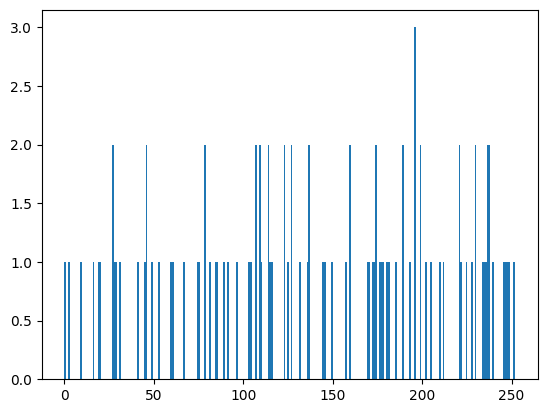

In [5]:
plt.hist(arr, bins=PIXELS_CNT);

## Task 2

### Calculate the frequency distribution of the values from Task 1 and visualize it.

In [6]:
# assuming we have to calculate the cumulative distribution
pdf, bin_edges = np.histogram(arr, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)

In [7]:
pdf

array([0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.01, 0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
       0.  , 0.  , 0.02, 0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.02, 0.  , 0.02,
       0.01, 0.  , 0.  , 0.  , 0.02, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.

In [8]:
bin_edges

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [9]:
cdf = np.cumsum(pdf * np.diff(bin_edges))
cdf

array([0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.05, 0.06, 0.06,
       0.06, 0.06, 0.06, 0.06, 0.06, 0.08, 0.09, 0.1 , 0.1 , 0.11, 0.11,
       0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12,
       0.12, 0.13, 0.15, 0.15, 0.15, 0.16, 0.16, 0.16, 0.16, 0.17, 0.17,
       0.17, 0.17, 0.17, 0.17, 0.17, 0.18, 0.19, 0.19, 0.19, 0.19, 0.19,
       0.19, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.21, 0.22,
       0.22, 0.22, 0.24, 0.24, 0.24, 0.25, 0.25, 0.26, 0.27, 0.27, 0.27,
       0.27, 0.28, 0.28, 0.29, 0.29, 0.29, 0.29, 0.29, 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.31, 0.32, 0.32, 0.32, 0.34, 0.34, 0.36,
       0.37, 0.37, 0.37, 0.37, 0.39, 0.4 , 0.41, 0.41, 0.41, 0.41, 0.41,
       0.41, 0.41, 0.43, 0.43, 0.44, 0.44, 0.46, 0.46, 0.46, 0.46, 0.46,
       0.47, 0.47, 0.47, 0.47, 0.48, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.51, 0.52, 0.52, 0.52, 0.52, 0.

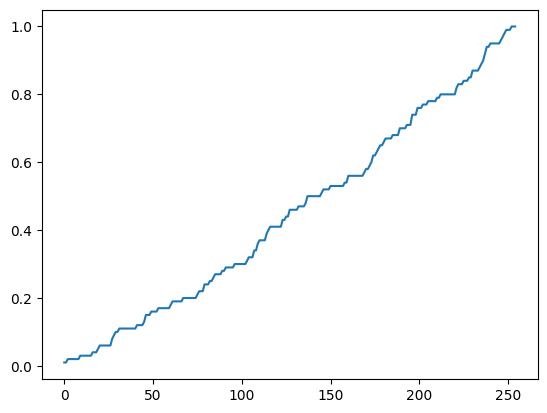

In [10]:
plt.plot(cdf);

## Task 3

### Equalize the histogram of the values from Task 1.

In [11]:
equalized = cv.equalizeHist(arr)
equalized

array([[ 41],
       [116],
       [157],
       [108],
       [178],
       [ 80],
       [157],
       [ 64],
       [ 98],
       [193],
       [188],
       [ 46],
       [ 75],
       [242],
       [170],
       [131],
       [ 85],
       [ 62],
       [137],
       [255],
       [ 26],
       [ 31],
       [ 85],
       [147],
       [ 52],
       [252],
       [214],
       [162],
       [ 28],
       [ 44],
       [ 67],
       [201],
       [178],
       [142],
       [193],
       [111],
       [180],
       [ 77],
       [245],
       [165],
       [247],
       [142],
       [ 18],
       [229],
       [216],
       [  0],
       [  5],
       [129],
       [240],
       [118],
       [222],
       [ 23],
       [126],
       [ 10],
       [227],
       [196],
       [188],
       [160],
       [167],
       [ 36],
       [203],
       [ 13],
       [224],
       [ 98],
       [116],
       [  8],
       [ 59],
       [222],
       [ 90],
       [ 49],
       [126],
      

In [12]:
equalized = np.squeeze(equalized)
equalized

array([ 41, 116, 157, 108, 178,  80, 157,  64,  98, 193, 188,  46,  75,
       242, 170, 131,  85,  62, 137, 255,  26,  31,  85, 147,  52, 252,
       214, 162,  28,  44,  67, 201, 178, 142, 193, 111, 180,  77, 245,
       165, 247, 142,  18, 229, 216,   0,   5, 129, 240, 118, 222,  23,
       126,  10, 227, 196, 188, 160, 167,  36, 203,  13, 224,  98, 116,
         8,  59, 222,  90,  49, 126,  90, 121, 173, 188,  18,  39, 250,
       134, 103, 149, 100, 240,  93, 152,   3, 234, 211,  36,  70, 108,
       144,  59,  72, 209, 234, 198,  54,  21, 209], dtype=uint8)

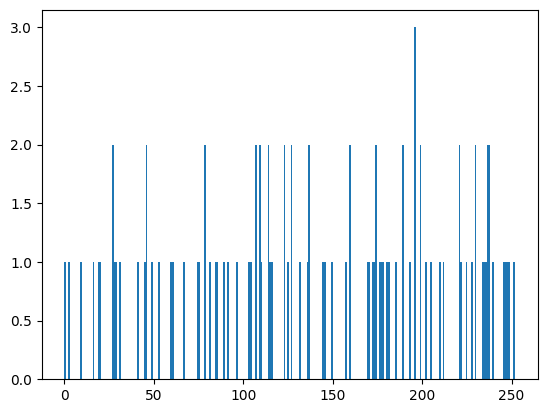

In [13]:
# Before
plt.hist(arr, bins=PIXELS_CNT);

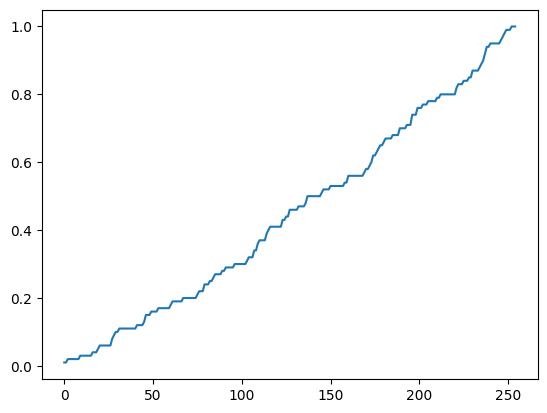

In [14]:
plt.plot(cdf);

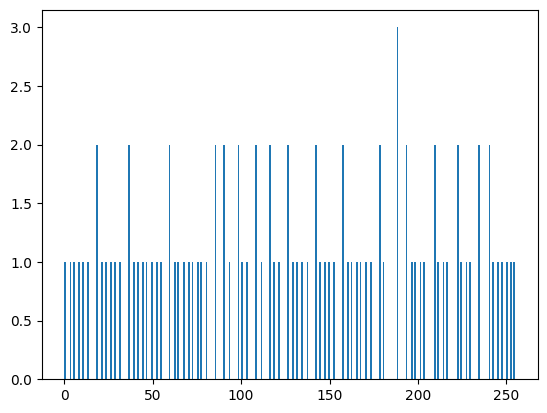

In [15]:
# After
plt.hist(equalized, bins=PIXELS_CNT);

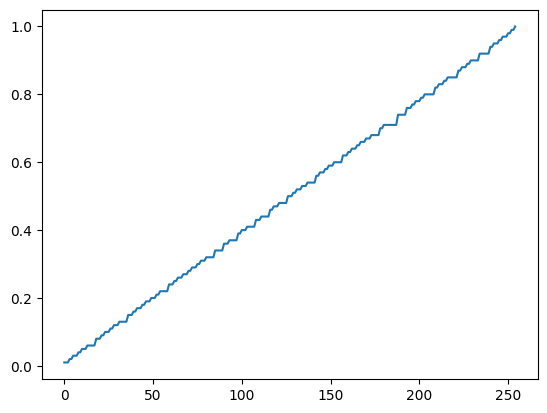

In [16]:
eq_pdf, eq_bin_edges = np.histogram(equalized, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
eq_cdf = np.cumsum(eq_pdf * np.diff(eq_bin_edges))
plt.plot(eq_cdf);

## Task 4

### Flatten the histogram of a 100x200 matrix of random values between 0 and 255.

In [17]:
arr = np.random.normal(127, 25, (100, 200))
arr = np.clip(arr, 0, 255)
arr

array([[131.23739049, 171.59794292, 119.02680661, ..., 114.58634278,
        172.33681732, 114.24867129],
       [133.11324388, 130.39558983, 132.69784144, ..., 126.81364384,
        160.71336281, 114.14027213],
       [131.12330639, 133.34965853,  95.45341816, ...,  98.83603745,
        138.95113605, 183.87318385],
       ...,
       [121.49560427, 119.66261899, 152.2393516 , ..., 134.15442397,
        159.67168124, 128.97912329],
       [130.77621676, 131.72661805, 118.49106645, ..., 125.32437149,
         99.08297418, 160.66919661],
       [137.73181989, 109.22517984, 120.04647245, ..., 156.2369513 ,
         89.41989422, 130.55504568]])

In [18]:
arr.min(), arr.max(), arr.mean(), arr.std()

(32.43358737712302, 225.15432199731663, 127.39702222776138, 24.875526483853264)

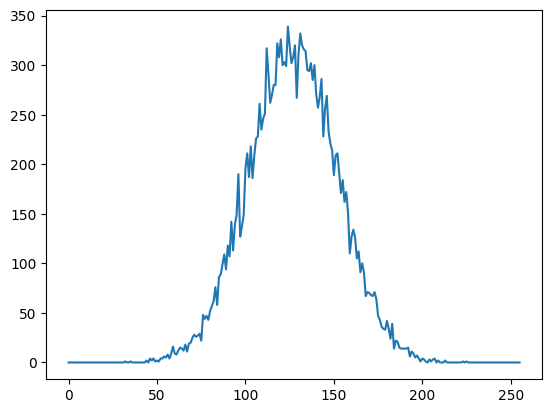

In [20]:
histogram_np, _ = np.histogram(arr, bins=np.arange(PIXELS_CNT+2))
histogram_np

plt.plot(np.arange(256), histogram_np);

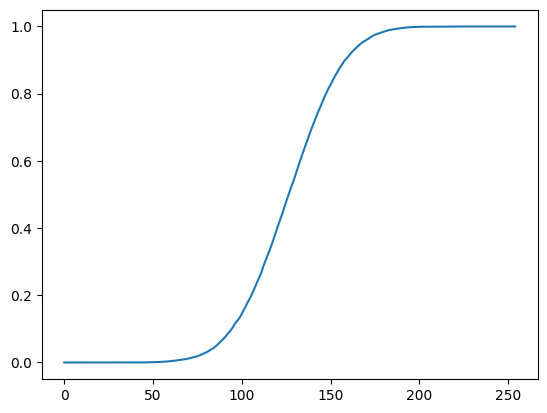

In [21]:
pdf, bin_edges = np.histogram(arr, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
cdf = np.cumsum(pdf * np.diff(bin_edges))
plt.plot(cdf);

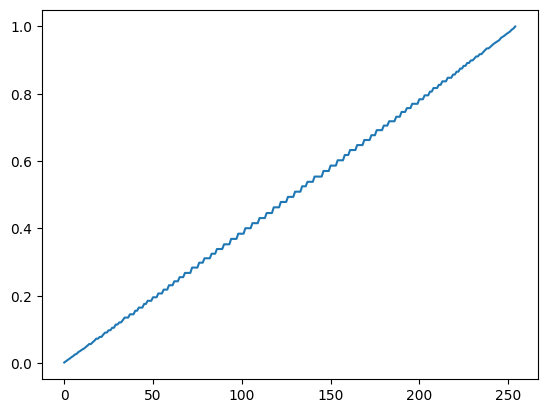

In [22]:
# After

# Convert to uint8 for opencv.
arr = arr.astype(np.uint8)

equalized = cv.equalizeHist(arr)
equalized = np.squeeze(equalized)

eq_pdf, eq_bin_edges = np.histogram(equalized, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
eq_cdf = np.cumsum(eq_pdf * np.diff(eq_bin_edges))
plt.plot(eq_cdf);

## Task 5

### Convert the image cube.jpg from RGB (BGR) to GRAYSCALE and to HSV colors models.

In [21]:
im = cv.imread('./assets/cube.jpg')

cv.imshow("bgr", im)

cv.waitKey(0)
cv.destroyAllWindows()

   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.


In [22]:
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

cv.imshow("grayscale", im_gray)

cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

cv.imshow("grayscale", im_hsv)

cv.waitKey(0)
cv.destroyAllWindows()

## Task 6

### Flatten the gray.jpg histogram.

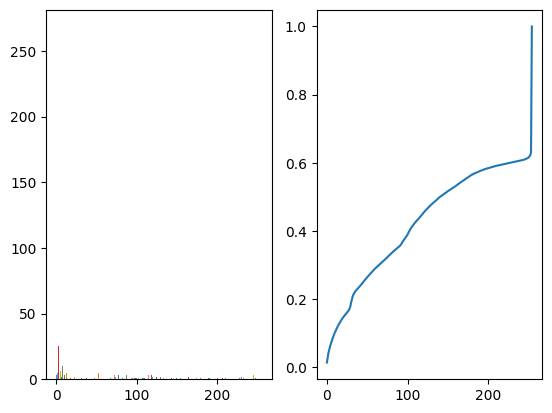

In [24]:
# Before

plt.subplot(121)
plt.hist(im_gray, bins=PIXELS_CNT);

plt.subplot(122)
pdf, bin_edges = np.histogram(im_gray, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
cdf = np.cumsum(pdf * np.diff(bin_edges))
plt.plot(cdf);

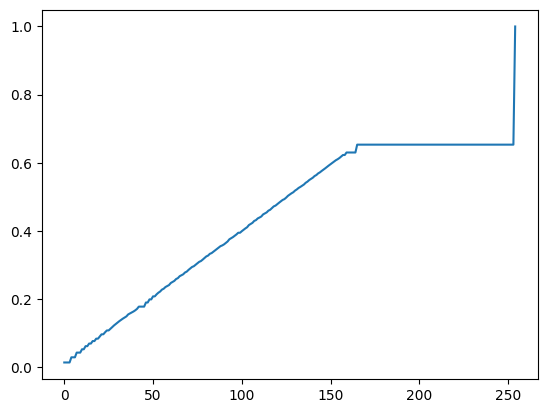

In [25]:
# After
equalized = cv.equalizeHist(im_gray)
equalized = np.squeeze(equalized)

eq_pdf, eq_bin_edges = np.histogram(equalized, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
eq_cdf = np.cumsum(eq_pdf * np.diff(eq_bin_edges))
plt.plot(eq_cdf);

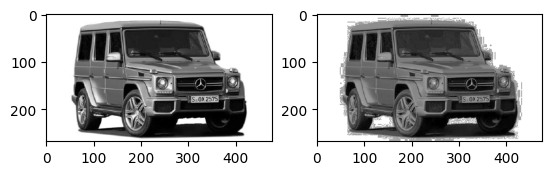

In [26]:
# compare images
plt.subplot(121)
plt.imshow(im_gray, cmap='gray')
plt.subplot(122)
plt.imshow(equalized, cmap='gray')

## Task 7

### Align the histograms of the R, G, and B components of color.jpg.

In [27]:
im = cv.imread('./assets/color.jpg')

cv.imshow("bgr", im)

cv.waitKey(0)
cv.destroyAllWindows()

In [28]:
b, g, r = im[:, :, 0], im[:, :, 1], im[:, :, 2]

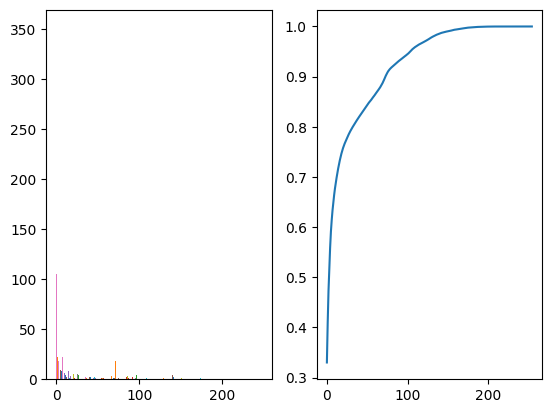

In [29]:
plt.subplot(121)
plt.hist(b, bins=PIXELS_CNT);

plt.subplot(122)
pdf, bin_edges = np.histogram(b, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
cdf = np.cumsum(pdf * np.diff(bin_edges))
plt.plot(cdf);

In [ ]:
plt.subplot(121)
plt.hist(g, bins=PIXELS_CNT);

plt.subplot(122)
pdf, bin_edges = np.histogram(g, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
cdf = np.cumsum(pdf * np.diff(bin_edges))
plt.plot(cdf);

In [ ]:
plt.subplot(121)
plt.hist(r, bins=PIXELS_CNT);

plt.subplot(122)
pdf, bin_edges = np.histogram(r, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
cdf = np.cumsum(pdf * np.diff(bin_edges))
plt.plot(cdf);

In [ ]:
# After
equalized = cv.equalizeHist(b)
equalized = np.squeeze(equalized)

eq_pdf, eq_bin_edges = np.histogram(equalized, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
eq_cdf = np.cumsum(eq_pdf * np.diff(eq_bin_edges))
plt.plot(eq_cdf);

In [ ]:
# After
equalized = cv.equalizeHist(g)
equalized = np.squeeze(equalized)

eq_pdf, eq_bin_edges = np.histogram(equalized, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
eq_cdf = np.cumsum(eq_pdf * np.diff(eq_bin_edges))
plt.plot(eq_cdf);

In [ ]:
# After
equalized = cv.equalizeHist(r)
equalized = np.squeeze(equalized)

eq_pdf, eq_bin_edges = np.histogram(equalized, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
eq_cdf = np.cumsum(eq_pdf * np.diff(eq_bin_edges))
plt.plot(eq_cdf);

## Task 8

### Flatten the histogram of the luminance component of color.jpg.

In [ ]:
lumi = im_hsv[:, :, 2]
lumi

In [ ]:
plt.subplot(121)
plt.hist(lumi, bins=PIXELS_CNT)

plt.subplot(122)
pdf, bin_edges = np.histogram(lumi, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
cdf = np.cumsum(pdf * np.diff(bin_edges))
plt.plot(cdf);

In [ ]:
equalized = cv.equalizeHist(lumi)
equalized = np.squeeze(equalized)

eq_pdf, eq_bin_edges = np.histogram(equalized, range=(0, PIXELS_CNT), bins=PIXELS_CNT, density=True)
eq_cdf = np.cumsum(eq_pdf * np.diff(eq_bin_edges))
plt.plot(eq_cdf);

## Task 9 (extra)

Equalize the histogram of `gray.jpg`.

In [23]:
im = cv.imread('./assets/gray.jpg', cv.IMREAD_GRAYSCALE)
im.shape

(683, 1024)

In [24]:
cv.imshow('gray', im)

cv.waitKey(0)
cv.destroyAllWindows()

   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/work/Dev/image_preprocessing/venv~/lib/python3.10/site-packages/cv2/qt/plugins"


In [25]:
# calculate histogram
histogram_np, _ = np.histogram(im, bins=np.arange(PIXELS_CNT+2))
histogram_np

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     1,    12,
          19,    49,    93,   220,   488,  1061,  1747,  2160,  2718,
        3259,  4039,

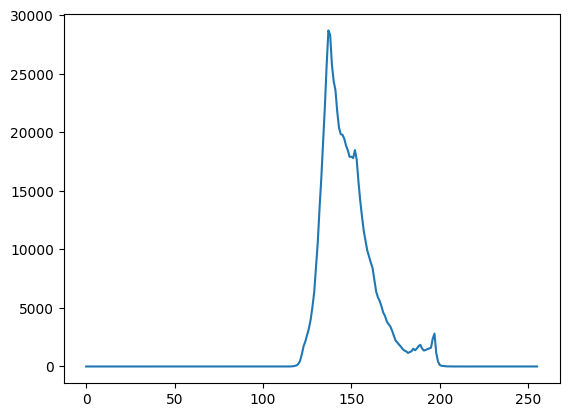

In [26]:
plt.plot(np.arange(256), histogram_np);

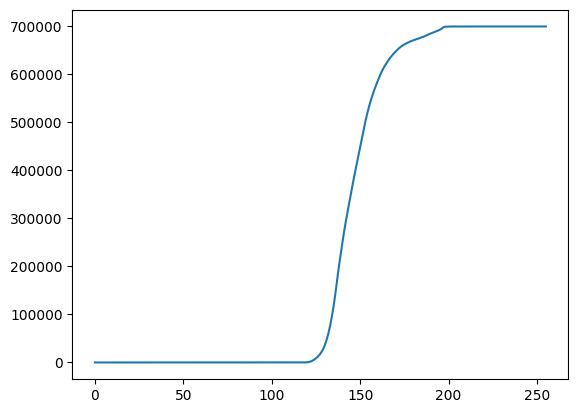

In [27]:
# plot cumulative distribution
cdf_np = np.cumsum(histogram_np)
plt.plot(np.arange(256), cdf_np);

In [28]:
# equalization
grayscale_equalized = cv.equalizeHist(im)

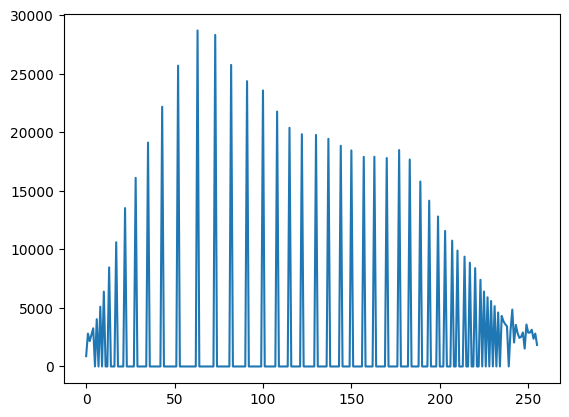

In [29]:
# calculate histogram
histogram_np_eq, _ = np.histogram(grayscale_equalized, bins=np.arange(PIXELS_CNT+2))
plt.plot(np.arange(256), histogram_np_eq);

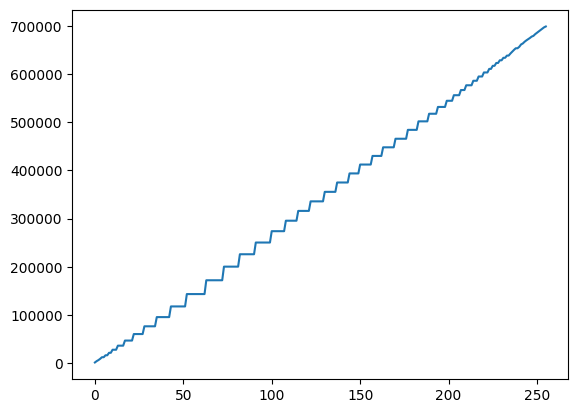

In [30]:
cdf_np_eq = np.cumsum(histogram_np_eq)
plt.plot(np.arange(256), cdf_np_eq);

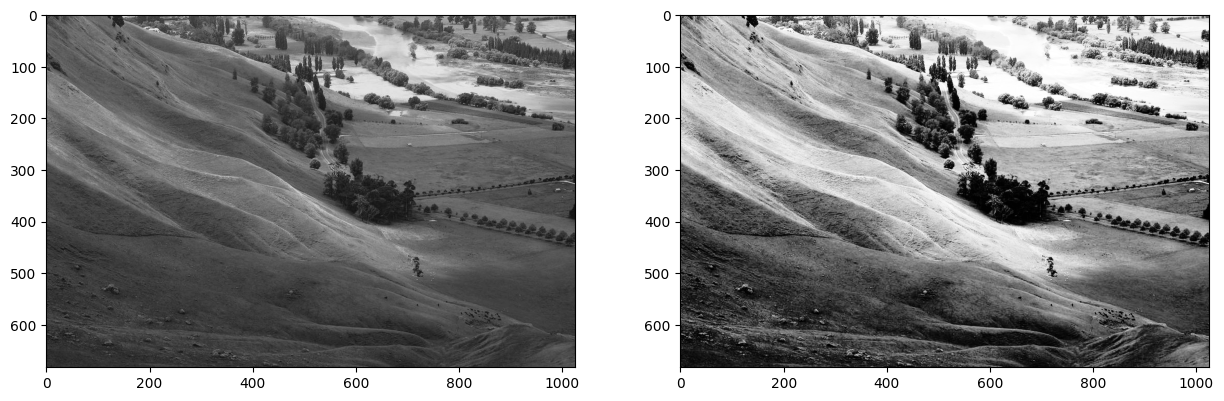

In [31]:
# compare images
plt.figure(figsize=(15,13))
plt.subplot(121)
plt.imshow(im, 'gray')
plt.subplot(122)
plt.imshow(grayscale_equalized, 'gray');